In [1]:
import json
from dataclasses import dataclass
from typing import Optional
from functools import singledispatchmethod
from pathlib import Path
import numpy as np
import awkward as ak
import uproot
import numpy as np
import numpy.typing as npt
import pandas as pd
import uproot.writing
from hist.hist import Hist
from hist.axis import StrCategory
#from RPCDPGAnalysis.NanoAODTnP.RPCGeomServ import get_roll_name

from functools import cache
from functools import cached_property

import matplotlib.pyplot as plt

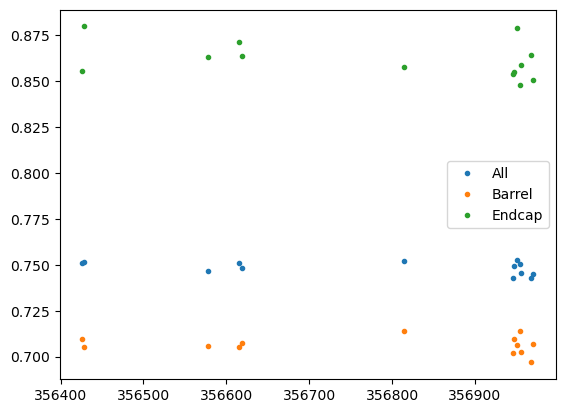

In [2]:
input_path = 'flatten_output_100.root'
tree = uproot.open(f'{input_path}:tree')
data = tree.arrays(library='pd')

runs = np.unique(data['run'])
effs, barrel_effs, endcap_effs = [], [], []

for run in runs:
    run_data = data[data['run'] == run]
    pass_run_data = run_data[run_data['is_matched']]
    
    eff = len(pass_run_data) / len(run_data)
    barrel_eff = len(pass_run_data[pass_run_data['region'] == 0]) / len(run_data[run_data['region'] == 0])
    endcap_eff = len(pass_run_data[pass_run_data['region'] != 0]) / len(run_data[run_data['region'] != 0])
    
    effs.append(eff)
    barrel_effs.append(barrel_eff)
    endcap_effs.append(endcap_eff)

plt.plot(runs, effs, ".", label='All')
plt.plot(runs, barrel_effs, ".", label='Barrel')
plt.plot(runs, endcap_effs, ".", label='Endcap')
plt.legend()
plt.show()